In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Read data

In [2]:
df = pd.read_csv("cleaned_data_project3.csv", index_col=0)
df.head()

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x19,x20,x21,x22,x23,x25,x26,x28,x29,x31
0,1,0.080262,1,50,5,5,5,4,3,5,...,5,3,4,3,-1.730803,1,1,1,-1.725104,2.380952
1,1,1.089816,1,44,1,1,1,1,3,3,...,4,4,4,2,-1.731503,0,1,1,-1.697040,10.000000
2,0,0.235445,1,72,3,1,5,5,3,2,...,3,1,3,2,-1.731503,0,1,3,-1.683108,10.000000
3,0,1.601126,1,38,1,3,1,3,5,1,...,4,1,4,5,-1.731503,0,0,3,-1.700973,10.000000
4,1,1.053820,0,37,5,5,5,5,2,5,...,4,4,4,5,-1.731503,0,1,1,-1.718505,10.000000


# 2. Train-test-split

In [3]:
y = df["y"]
x = df.drop(columns="y")
print(x.shape, y.shape)

(101174, 23) (101174,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train, x_test, sep="\n")

             x2  x3  x5  x9  x10  x11  x12  x13  x14  x15  ...  x19  x20  x21  \
33471 -1.067377   1  50   4    3    3    4    4    4    4  ...    5    5    5   
9779  -1.378309   0  51   1    5    4    5    2    1    1  ...    1    1    4   
61009  1.350021   0  27   4    4    4    4    5    5    5  ...    4    4    4   
73581  1.525001   1  66   1    4    1    3    3    5    4  ...    4    4    4   
33816 -1.466932   0  41   4    3    4    4    3    4    4  ...    4    3    4   
...         ...  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
21243 -0.068788   1  26   3    3    3    2    2    3    2  ...    5    4    4   
45891  0.038367   0  37   5    5    5    5    2    5    2  ...    4    5    5   
42613  0.736889   0  34   3    5    2    3    5    2    5  ...    3    5    5   
43567  0.930101   0  33   2    4    2    3    5    2    5  ...    2    2    4   
68268  0.018769   1  54   3    4    4    4    1    4    4  ...    4    4    4   

       x22       x23  x25  

# 3. Model, predict and solve the problem

In [5]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
rf_predict = rf.predict(x_test)

In [7]:
rf_acc = metrics.accuracy_score(y_test, rf_predict)
rf_pre = metrics.precision_score(y_test, rf_predict)
rf_rec = metrics.recall_score(y_test, rf_predict)
rf_f1 = metrics.f1_score(y_test, rf_predict)

print(f"Accuracy : {rf_acc:.3f}")
print(f"Precision : {rf_pre:.3f}")
print(f"Recall : {rf_rec:.3f}")
print(f"F1-Score : {rf_f1:.3f}")

Accuracy : 0.964
Precision : 0.975
Recall : 0.942
F1-Score : 0.958


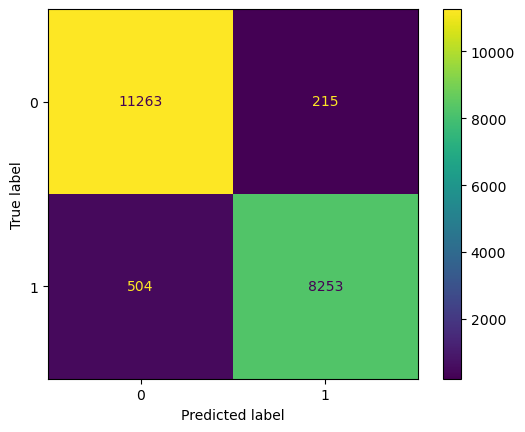

In [8]:
rf_cm = metrics.confusion_matrix(y_test, rf_predict)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_disp.plot()
plt.show()

Test AUC: 0.9941530607938411


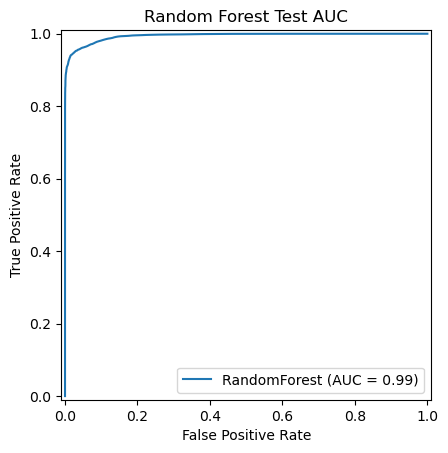

In [9]:
rf_fpr, rf_tpr, rf_thres = metrics.roc_curve(y_test, rf.predict_proba(x_test)[:,1])
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)
print("Test AUC:", rf_roc_auc)

rf_display = metrics.RocCurveDisplay(fpr=rf_fpr, tpr=rf_tpr, roc_auc=rf_roc_auc,
                                     name="RandomForest")
rf_display.plot()
plt.title("Random Forest Test AUC")
plt.show()

Train AUC: 1.0


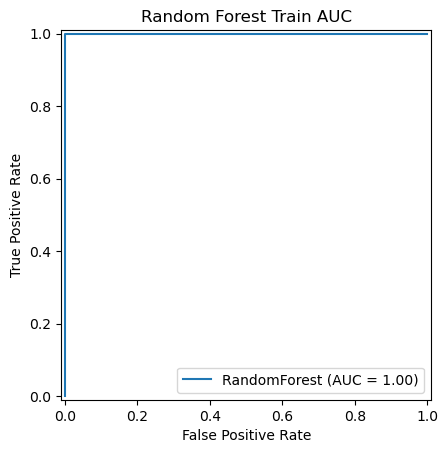

In [10]:
rf_fpr, rf_tpr, rf_thres = metrics.roc_curve(y_train, rf.predict_proba(x_train)[:,1])
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)
print("Train AUC:", rf_roc_auc)

rf_display = metrics.RocCurveDisplay(fpr=rf_fpr, tpr=rf_tpr, roc_auc=rf_roc_auc,
                                     name="RandomForest")
rf_display.plot()
plt.title("Random Forest Train AUC")
plt.show()

# 4. Hyper-parameter tuning

In [15]:
param_grid_rf = {"n_estimators":list(range(200, 601, 200)),
                 "max_depth": [None, 10, 20, 30],
                 "min_samples_leaf": [1, 2, 4],
                 "max_features" : ["sqrt", "log2"]}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring="roc_auc",
                       verbose=2)

In [16]:
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=  11.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=  11.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=  11.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=  11.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=  11.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=400; total time=  23.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=400; total time=  23.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=400; total time=  23.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=400; total time=  23.0s
[CV] END max_depth=None, max_

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [200, 400, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,600


In [17]:
print(grid_rf.best_params_)

{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 600}


In [18]:
rf_best = grid_rf.best_estimator_

In [19]:
y_rf_best_predict = rf_best.predict(x_test)

In [20]:
rf_acc = metrics.accuracy_score(y_test, y_rf_best_predict)
rf_pre = metrics.precision_score(y_test, y_rf_best_predict)
rf_rec = metrics.recall_score(y_test, y_rf_best_predict)
rf_f1 = metrics.f1_score(y_test, y_rf_best_predict)

print(f"Accuracy : {rf_acc:.3f}")
print(f"Precision : {rf_pre:.3f}")
print(f"Recall : {rf_rec:.3f}")
print(f"F1-Score : {rf_f1:.3f}")

Accuracy : 0.965
Precision : 0.974
Recall : 0.944
F1-Score : 0.959


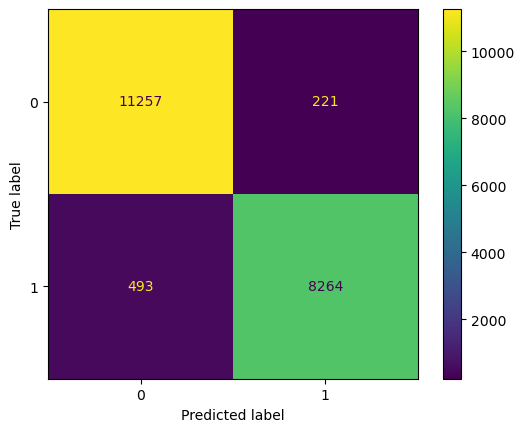

In [21]:
rf_cm = metrics.confusion_matrix(y_test, y_rf_best_predict)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_disp.plot()
plt.show()

0.9944024020571461


c:\anaconda3\envs\UF_ADS_313\Lib\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


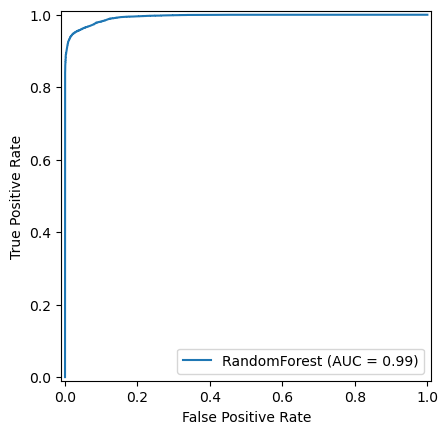

In [22]:
rf_fpr, rf_tpr, rf_thres = metrics.roc_curve(y_test, rf_best.predict_proba(x_test)[:,1])
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)
print(rf_roc_auc)

rf_display = metrics.RocCurveDisplay(fpr=rf_fpr, tpr=rf_tpr, roc_auc=rf_roc_auc,
                                     estimator_name="RandomForest")
rf_display.plot()
plt.show()

# 5. Conclusion

Default RandomForest shows AUC 0.9941530607938411. And Hyper-parameter tuned model shows 0.9944024020571461.

Hyper-parameter tuned RandomForest shows slightly higher than default model.